<a href="https://colab.research.google.com/github/darqtom/ml_a-z_udemy/blob/master/Regression/SupportVectorRegression/position_salaries_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [36]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [37]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [38]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [39]:
y = y.reshape(-1, 1)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [41]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [42]:
from sklearn.svm import SVR
svr_reg = SVR(kernel="rbf")
svr_reg.fit(X, y.reshape(-1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [44]:
y_pred = svr_reg.predict(sc_X.transform([[6.5]]))
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[170370.0204065]


## Visualising the SVR results

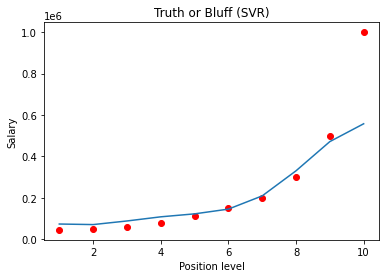

In [46]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_reg.predict(X)))
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

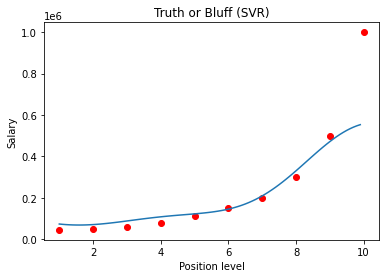

In [54]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1).reshape(-1, 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_grid))))
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()